# Simulator runner

In [9]:
import matplotlib.pyplot as plt
import random
%matplotlib notebook
%config Application.log_level="INFO"

In [2]:
from utilitysim import InferenceJob, TrainingJob, get_optimus_fn, get_tanh_fn, get_linear_fn, get_tanh_fn, simulator, thief_scheduler

In [3]:
job_count = 10
retraining_period = 200
training_jobs = []
inference_jobs = []

for j in range(job_count):
    start_accuracy = random.randint(10,60)
    conv_time = random.randint(1,100)
    train_func, train_inv_func = get_optimus_fn(conv_time)
    init_time = train_inv_func(start_accuracy)
    
    inferencejob = InferenceJob("{}_inference".format(j), start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
    trainjob = TrainingJob("{}_train".format(j), train_func, init_time, conv_time, resource_alloc=0, inference_job=inferencejob)
    
    training_jobs.append(trainjob)
    inference_jobs.append(inferencejob)

In [3]:
a_conv_time = 10
b_conv_time = 50
target_start_accuracy = 50
retraining_period = 100
a_func, a_inv_func = get_optimus_fn(a_conv_time)
b_func, b_inv_func = get_optimus_fn(b_conv_time)
init_time_a = a_inv_func(target_start_accuracy)
init_time_b = b_inv_func(target_start_accuracy)

A_inference = InferenceJob("A_inference", target_start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
B_inference = InferenceJob("B_inference", target_start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
A_train = TrainingJob("A_train", a_func, init_time_a, a_conv_time, resource_alloc=0, inference_job=A_inference)
B_train = TrainingJob("B_train", b_func, init_time_b, b_conv_time, resource_alloc=0, inference_job=B_inference)


training_jobs = [B_train, A_train]
inference_jobs = [B_inference, A_inference]

In [4]:
print(training_jobs)
print(inference_jobs)

[<utilitysim.TrainingJob object at 0x7f8cf2a56710>, <utilitysim.TrainingJob object at 0x7f8cf2a56748>]
[<utilitysim.InferenceJob object at 0x7f8cf2a56668>, <utilitysim.InferenceJob object at 0x7f8cf2a566a0>]


In [5]:
sim = simulator(training_jobs, inference_jobs, 1, retraining_period=retraining_period, scheduling_algo=thief_scheduler, sim_name='main')
results = sim.step_till_completion()

Period allocation: {0: {'B_train': 0.04999999999999999, 'A_train': 0.25, 'B_inference': 0.45, 'A_inference': 0.25}, 36.0: {'A_train': 0, 'B_train': 0.1333333333333333, 'B_inference': 0.5333333333333333, 'A_inference': 0.3333333333333333}, 360.0000000000001: {'B_train': 0, 'A_train': 0, 'B_inference': 0.6, 'A_inference': 0.39999999999999997}}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
Job A_train is done.
36
Job A_train is done.
37
Job A_train is done.
38
Job A_train is done.
39
Job A_train is done.
40
Job A_train is done.
41
Job A_train is done.
42
Job A_train is done.
43
Job A_train is done.
44
Job A_train is done.
45
Job A_train is done.
46
Job A_train is done.
47
Job A_train is done.
48
Job A_train is done.
49
Job A_train is done.
50
Job A_train is done.
51
Job A_train is done.
52
Job A_train is done.
53
Job A_train is done.
54
Job A_train is done.
55
Job A_train is done.
56
Job A_train is done.
57
Job A_train is done.
58
Job A_tr

{0: {0: {'B_train': 0.25, 'A_train': 0.25, 'B_inference': 0.25, 'A_inference': 0.25}, 36.0: {'A_train': 0, 'B_train': 0.3333333333333333, 'B_inference': 0.3333333333333333, 'A_inference': 0.3333333333333333}, 144.0: {'B_train': 0, 'A_train': 0, 'B_inference': 0.5, 'A_inference': 0.5}}, 1: {0: {'B_train': 0.35, 'A_train': 0.15, 'B_inference': 0.25, 'A_inference': 0.25}, 60.0: {'A_train': 0, 'B_train': 0.39999999999999997, 'B_inference': 0.3, 'A_inference': 0.3}, 120.0: {'B_train': 0, 'A_train': 0, 'B_inference': 0.5, 'A_inference': 0.5}}, 2: {0: {'B_train': 0.45, 'A_train': 0.04999999999999999, 'B_inference': 0.25, 'A_inference': 0.25}, 100.0: {'B_train': 0, 'A_train': 0.19999999999999998, 'B_inference': 0.4, 'A_inference': 0.4}, 120.0: {'B_train': 0, 'A_train': 0, 'B_inference': 0.5, 'A_inference': 0.5}}, 3: {0: {'B_train': 0.25, 'A_train': 0.25, 'B_inference': 0.25, 'A_inference': 0.25}, 36.0: {'A_train': 0, 'B_train': 0.3333333333333333, 'B_inference': 0.3333333333333333, 'A_inferenc

In [6]:
results['meta']

{'inf_mean_auc': 24.26411822858087}

# Visualization

### Accuracy progression

<IPython.core.display.Javascript object>


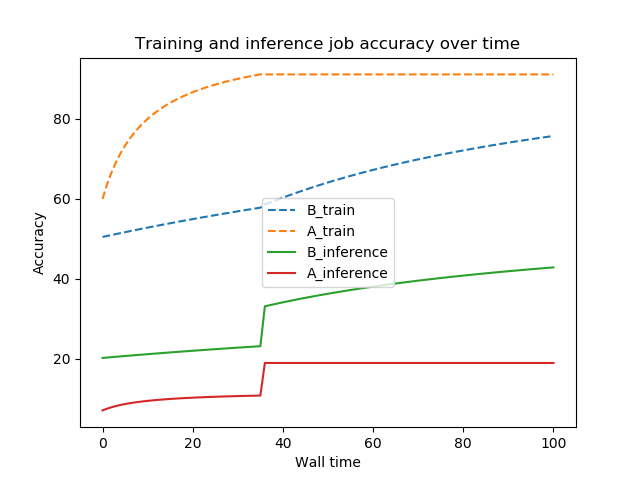

Text(0, 0.5, 'Accuracy')

In [10]:
plt.figure()
for job, result in results.items():
    if job != 'meta':
        t, acc = list(zip(*result))
        if "train" in job.name:
            style = '--'
        if "inference" in job.name:
            style = '-'
        plt.plot(t, acc, label=job.name, ls=style)
plt.title("Training and inference job accuracy over time")
plt.legend()
plt.xlabel("Wall time")
plt.ylabel("Accuracy")

['B_train', 'A_train', 'B_inference', 'A_inference'] [0.04999999999999999, 0.25, 0.45, 0.25]
['A_train', 'B_train', 'B_inference', 'A_inference'] [0, 0.1333333333333333, 0.5333333333333333, 0.3333333333333333]
['A_train', 'B_train', 'B_inference', 'A_inference'] [0, 0, 0.6, 0.39999999999999997]


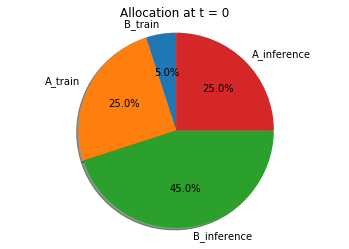

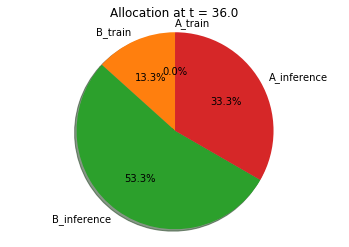

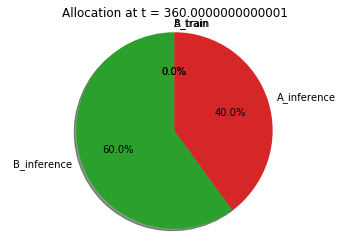

In [9]:
for t, allocation in sim.period_allocation.items():
    names = []
    allocs = []
    for j, alloc in allocation.items():
        allocs.append(alloc)
        names.append(j)
    print(names, allocs)
    plt.figure()
    plt.pie(allocs, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Allocation at t = {}".format(t))

In [26]:
means = []
for j, result in results.items():
    if isinstance(j, InferenceJob):
        mean_accuracy = sum(r[1] for r in result)/len(result)
        means.append(mean_accuracy)
MEAN_AUC = sum(means)/len(means)
print("Mean Inference Accuracy across all jobs: {}".format(MEAN_AUC))

Mean Inference Accuracy across all jobs: 1.592396706624593
